## Guess the street
- This nb will read the map data from open source map: https://www.openstreetmap.org/export#map=19/42.34210/-71.12258
- Given a set of strings that represent shops, street signals, railway lines, cafes, etc. it will try to find the street on which the strings lie

Links
1. OSM file description: https://wiki.openstreetmap.org/wiki/Elements 
2. OSM File usage: https://docs.osmcode.org/pyosmium/latest/intro.html
3. Lat-long calculation: https://www.meridianoutpost.com/resources/etools/calculators/calculator-latitude-longitude-distance.php?
     

In [9]:
# ! pip install osmium

In [2]:
import osmium

class CounterHandler(osmium.SimpleHandler):
    def __init__(self):
        osmium.SimpleHandler.__init__(self)
        self.num_nodes = 0

    def node(self, n):
        self.num_nodes += 1

class printTags(osmium.SimpleHandler):
    def __init__(self):
        super(printTags, self).__init__()
        self.places = []
        self.loc_x = []
        self.loc_y = []

    def node(self,o):
        if 'amenity' in o.tags and 'name' in o.tags:
            self.places.append(o.tags['name'])
            self.loc_x.append(o.location.x/(10**7))
            self.loc_y.append(o.location.y/(10**7))
            # print(o.tags['name'])

if __name__ == "__main__":
    h = printTags() # apply specified class method to required osm file
    h.apply_file('map.osm')

    places = h.places
    X,Y = h.loc_x,h.loc_y
    print('X,Y: ', X,Y)
    
    # print("Number of nodes: %d" % h.num_nodes)


X,Y:  [-71.1214413, -71.126027, -71.1207356, -71.1197144, -71.1214113, -71.1217191, -71.1217226, -71.1237042, -71.1230122, -71.1217736, -71.1229616, -71.1230848, -71.1232993, -71.1219519, -71.1221008, -71.1223194, -71.1212157, -71.1222966, -71.1216046, -71.1225782, -71.1229296, -71.1228558, -71.1233185, -71.1223838, -71.1224575, -71.1193538, -71.1170155, -71.1201765, -71.1203333, -71.121511, -71.1218629, -71.1218244, -71.1229899, -71.1231619, -71.1208327, -71.1216054, -71.1216798, -71.1218028, -71.1225158, -71.1244353, -71.1243615, -71.1240998, -71.1262814, -71.1235826, -71.1223815, -71.1235668, -71.1269168, -71.1233184, -71.1234968, -71.1223774, -71.1212367, -71.1238646, -71.126357] [42.3400974, 42.3444783, 42.3447026, 42.3421529, 42.3402385, 42.3400974, 42.344778, 42.3438208, 42.3434362, 42.3422824, 42.3419623, 42.3420652, 42.341859, 42.3427815, 42.3428767, 42.3420767, 42.3424227, 42.3429629, 42.3425852, 42.3428073, 42.3432999, 42.3432613, 42.3435616, 42.3427379, 42.342727, 42.342947

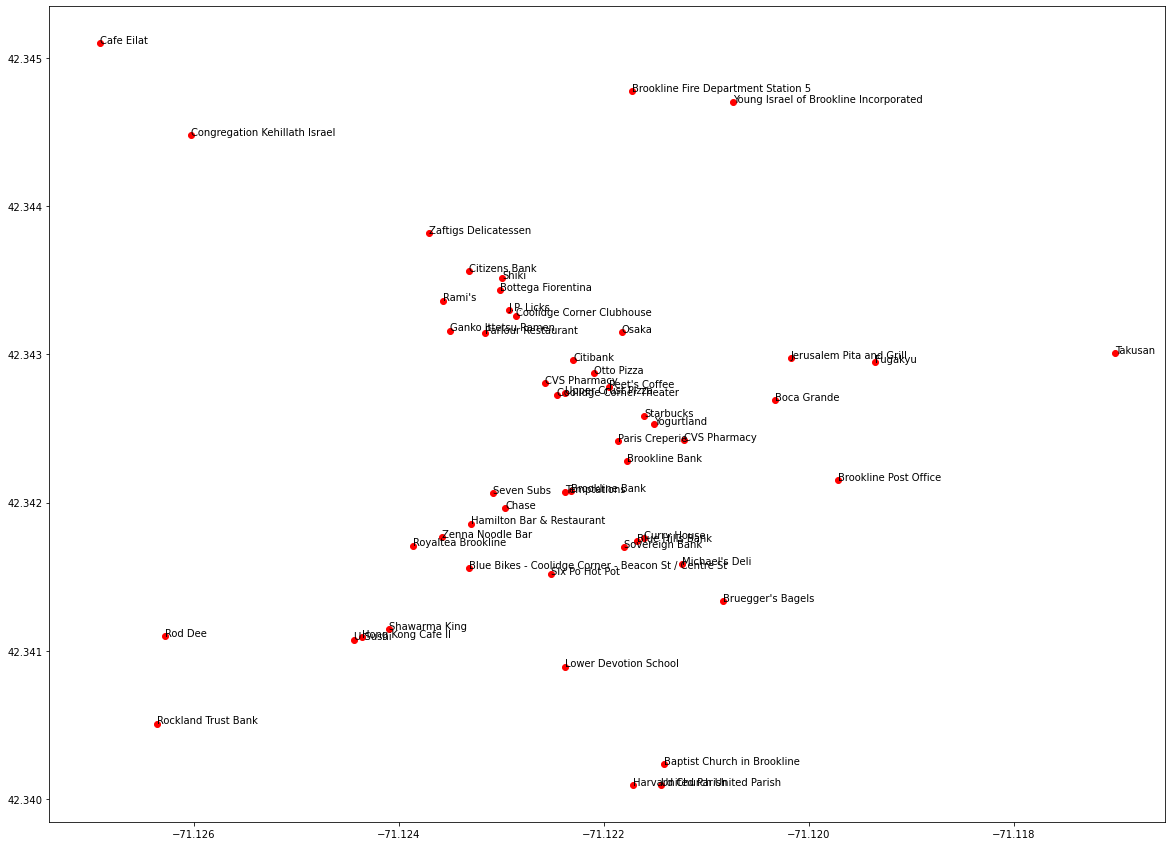

In [4]:
# Plot figure for mapping
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(X,Y, c='r', label='data')
for i, label in enumerate(h.places):
    plt.annotate(label, (X[i],Y[i]))
    # print(label)
plt.show()

In [58]:
# Sample distance calculation
p1 = 10
p2 = 5
dist = (((X[p1]-X[p2])**2 + (Y[p1]-Y[p2])**2)**0.5)*100
print('Y[p2]): ', Y[p2])
print('Y[p1]: ', Y[p1])
print('X[p2]: ', X[p2])
print('X[p1]: ', X[p1])
print('dist: ', dist)

Y[p2]):  42.3400974
Y[p1]:  42.3419623
X[p2]:  -71.1217191
X[p1]:  -71.1229616
dist:  0.22409056785098175


>Plan of attack:
- [x] Given a set of strings, should locate the street
- [x] Use distance based clustering algo + line plotting for checking direction ------ expand this after more thought
    

In [5]:
input_strings = ['Zenna Noodle Bar', 'Hamilton Bar & Restaurant', 'Chase','Seven Subs']
print('input_strings: ', input_strings[0])


input_strings:  Zenna Noodle Bar
